In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# carregando os dados
df = pd.read_csv("espectativa_vida.csv")

In [3]:
# visualizando quantidade de colunas e linhas (shape)
df.sha

AttributeError: 'DataFrame' object has no attribute 'sha'

In [4]:
# visualizando amostra dos dados (10 primeiras linhas)
df.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1509,Libya,2012,Developing,72.9,133.0,2,0.01,0.000000,98.0,320,...,98.0,4.30,98.0,0.1,NaN,NaN,5.6,5.4,0.706,13.7
833,El Salvador,2000,Developing,69.0,218.0,4,2.79,353.669033,99.0,0,...,98.0,8.17,99.0,0.4,2238.411600,5867626.0,2.1,2.0,0.607,11.3
2194,Saint Vincent and the Grenadines,2005,Developing,71.4,177.0,0,6.04,0.000000,99.0,0,...,93.0,3.66,99.0,0.2,NaN,NaN,3.7,3.7,0.692,13.3
81,Argentina,2014,Developing,76.2,118.0,8,7.93,847.371746,94.0,1,...,92.0,4.79,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3
241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,...,99.0,1.59,99.0,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3
1235,Iraq,2014,Developing,67.9,199.0,32,0.01,43.524080,62.0,1317,...,67.0,5.54,64.0,0.1,673.747370,3568.0,5.3,5.1,0.658,10.1
1524,Lithuania,2013,Developed,73.0,178.0,0,15.04,1968.816817,93.0,35,...,93.0,6.59,93.0,0.1,15712.823760,2957689.0,2.7,2.7,0.834,16.4
1481,Lesotho,2008,Developing,47.8,592.0,5,2.75,91.854328,88.0,0,...,86.0,8.85,88.0,27.3,934.428563,199993.0,8.0,7.8,0.447,10.7
2698,Turkmenistan,2014,Developing,66.0,217.0,7,2.90,691.133353,97.0,0,...,98.0,2.70,98.0,0.1,7962.365824,5466241.0,3.3,3.3,0.683,10.8
1458,Lebanon,2015,Developing,74.9,98.0,1,NaN,0.000000,81.0,39,...,75.0,NaN,81.0,0.1,846.632851,5851479.0,4.9,4.9,0.763,13.3


In [5]:
# tipos de dados
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
# como algumas variáveis possuem espaço entre os nomes
# ou espacos antes do nome, vamos ajustar isso por aqui
# nome das colunas
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# criaremos outro dataset com os nomes corretos das variáveis
# porém não utilizaremos todas, pois algumas variáveis não apresentam
# uma descrição clara do que elas são.
novo_df = pd.DataFrame({'country': df['Country'],
                       'life_expectancy': df['Life expectancy '],
                       'year': df['Year'],
                       'status': df['Status'],
                       'adult_mortality': df['Adult Mortality'],
                       'inf_death': df['infant deaths'],
                       'alcohol': df['Alcohol'],
                       'hepatitisB': df['Hepatitis B'],
                       'measles': df['Measles '],
                       'bmi': df[' BMI '],
                       'polio': df['Polio'],
                       'diphtheria': df['Diphtheria '],
                       'hiv': df[' HIV/AIDS'],
                       'gdp': df['GDP'],
                       'total_expenditure': df['Total expenditure'],
                       'thinness_till19': df[' thinness  1-19 years'],
                       'thinness_till9': df[' thinness 5-9 years'],
                       'school': df['Schooling'],
                       'population': df[' Population']})

In [8]:
novo_df.shape

(2938, 19)

In [9]:
# visualizando as 5 primeiras linhas
novo_df.head()

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
0,Afghanistan,65.0,2015,Developing,263.0,62,0.01,65.0,1154,19.1,6.0,65.0,0.1,584.259210,8.16,17.2,17.3,10.1,33736494.0
1,Afghanistan,59.9,2014,Developing,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0
2,Afghanistan,59.9,2013,Developing,268.0,66,0.01,64.0,430,18.1,62.0,64.0,0.1,631.744976,8.13,17.7,17.7,9.9,31731688.0
3,Afghanistan,59.5,2012,Developing,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0
4,Afghanistan,59.2,2011,Developing,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0


In [10]:
# criando um dicionário com a descrição de cada variável
dicionario_dados = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

In [11]:
# Por exemplo, nossa variável alvo (dependente) o que ela significa:
dicionario_dados['life_expectancy']

'Expectativa de vida ao nascer, em anos.'

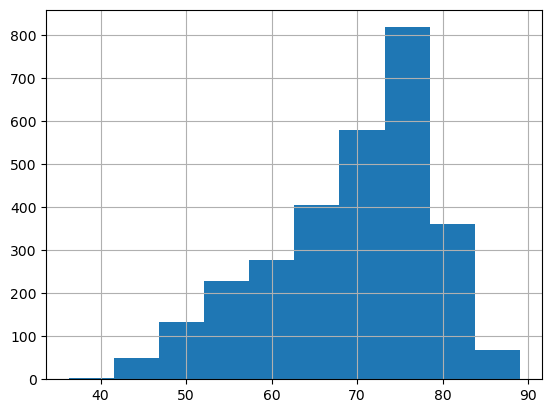

In [12]:
# histograma da variável alvo (variável quantitativa)
novo_df['life_expectancy'].hist();

In [13]:
# resumo estatístico das variáveis numéricas
novo_df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2928.000000,2938.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
mean,69.224932,2007.518720,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,9.523867,4.613841,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,36.300000,2000.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,63.100000,2004.000000,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,72.100000,2008.000000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,75.700000,2012.000000,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,17.60000,27.700000,28.600000,20.700000,1.293859e+09


In [14]:
# Função para o plot da relação da variável alvo com alguns atributos
# essa funcao foi criada para que possamos visualizar algumas regressoes 
# lineares simples, da variavel alvo, com outras variáveis.
def dsa_get_pairs(data, alvo, atributos, n):
    
    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

In [15]:
# variavel alvo (dependente)
alvo = ['life_expectancy']

In [16]:
# atributos (variáveis independentes)
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

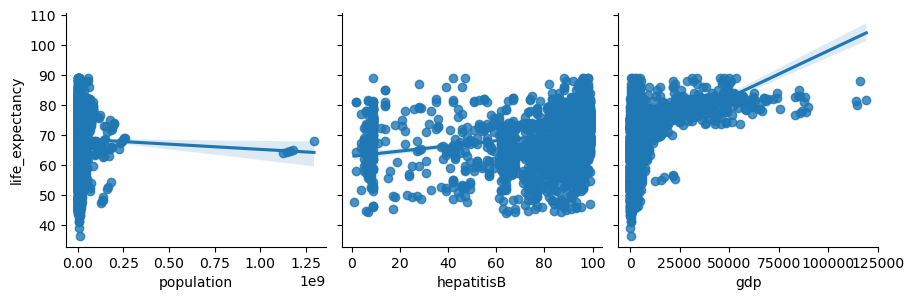

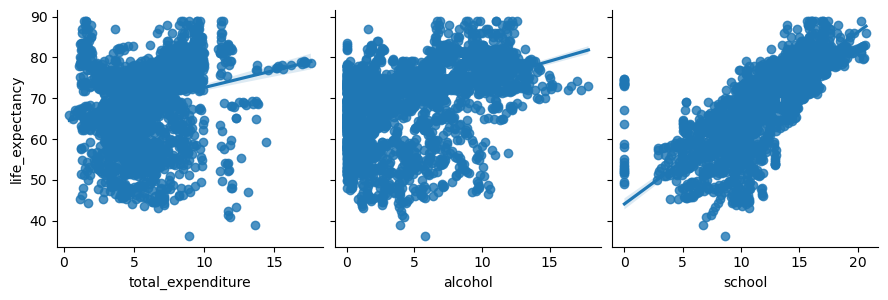

In [17]:
# verificando outliers e relação
# como atributos para a função eu passo o dataset (novo_df), a variavel alvo (alvo)
# e as variáveis independentes (atributos)
dsa_get_pairs(novo_df, alvo, atributos, 3)

In [18]:
# apesar de quando visualizamos as 10 primeiras linhas 
# ja observamos que tinha valores ausentes, agora iremos fazer uma contagem
# nas variveis, para confirmar
novo_df.count()

country              2938
life_expectancy      2928
year                 2938
status               2938
adult_mortality      2928
inf_death            2938
alcohol              2744
hepatitisB           2385
measles              2938
bmi                  2904
polio                2919
diphtheria           2919
hiv                  2938
gdp                  2490
total_expenditure    2712
thinness_till19      2904
thinness_till9       2904
school               2775
population           2286
dtype: int64

In [19]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [20]:
valores_ausentes

population           652
hepatitisB           553
gdp                  448
total_expenditure    226
alcohol              194
school               163
thinness_till9        34
thinness_till19       34
bmi                   34
polio                 19
diphtheria            19
life_expectancy       10
adult_mortality       10
hiv                    0
measles                0
inf_death              0
status                 0
year                   0
country                0
dtype: int64

In [21]:
# Calculando o percentual de valores ausentes
valores_ausentes_porcentagem = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0] 

In [22]:
valores_ausentes_porcentagem

population           0.221920
hepatitisB           0.188223
gdp                  0.152485
total_expenditure    0.076923
alcohol              0.066031
school               0.055480
thinness_till9       0.011572
thinness_till19      0.011572
bmi                  0.011572
polio                0.006467
diphtheria           0.006467
life_expectancy      0.003404
adult_mortality      0.003404
dtype: float64

In [23]:
# ignorar outliers e preencher os valores ausentes, não necessariamente seria um problema
# porque outliers podem realmente existir, eles impactam a média, sim, mas podem existir,
# Ex: uma turma de aluno com a maioria dos estudantes medindo entre 1,60 e 1,70, mas pode
# ter alguem com 2m de altura, ele foge da distribuição, mas existe

# varivaies com mais de 5% de valores ausentes
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

In [24]:
# criando um novo dataframe para verificar os outliers
novo_df2 = novo_df[atributos]

In [25]:
# identificando de outliers atraves do metodo do IQR (Interquartile Range)
Q1 = novo_df2.quantile(0.25)
Q3 = novo_df2.quantile(0.75)
IQR = Q3 - Q1

In [26]:
# definindo outliers com aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((novo_df2 < (Q1 - 1.5 * IQR)) | (novo_df2 > (Q3 + 1.5 * IQR))).sum()

In [27]:
outliers

population           294
hepatitisB           254
gdp                  365
total_expenditure     32
alcohol                0
school                44
dtype: int64

In [28]:
# resumo dos outliers
resumo_outliers = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(novo_df2)) * 100})

In [29]:
# resultados dos outliers quando o valor for maior do que zero
resumo_outliers[resumo_outliers['Outliers'] > 0]

,Outliers,Percentual
population,294,10.006807
hepatitisB,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
school,44,1.497617


In [30]:

# a decisao inicial, que pode ser mudada ao final (e seria voltar e refazer as análises),
# foi pela remocao dos outliers, pois varios algoritmos fazem os calculos com base na 
# média e eles podem impactar as analises, outra estrategia seria padronizar na utilizando
# logaritmo, mas por enquanto decidimos por remover utilizando a regra do IQR.
# definindo os limites para filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [31]:
# Considerações Importantes:

# A regra do 1.5 IQR é um método comum para identificar outliers, mas não é uma regra rígida.
# A escolha do multiplicador (1.5) pode variar em diferentes contextos e conjuntos de dados.
# É importante analisar visualmente a distribuição dos dados para confirmar a presença de outliers e ajustar os limites, se necessário.
# Outras técnicas para identificar outliers podem ser utilizadas em conjunto com a regra do IQR.

# Filtrando os outliers 
# detalhe para o ~ presente aqui, ele nega a estrutura, ou seja, qualquer coisa que nao tiver dentro dos 
# limites inferior e superior será excluido do novo dataset
novo_df3 = novo_df[~((novo_df2 < limite_inferior) | (novo_df2 > limite_superior)).any(axis = 1)]

In [32]:
novo_df3.shape

(2044, 19)

In [33]:
novo_df3.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [34]:
# valor maximo de populacao
novo_df3.population.max()

17899562.0

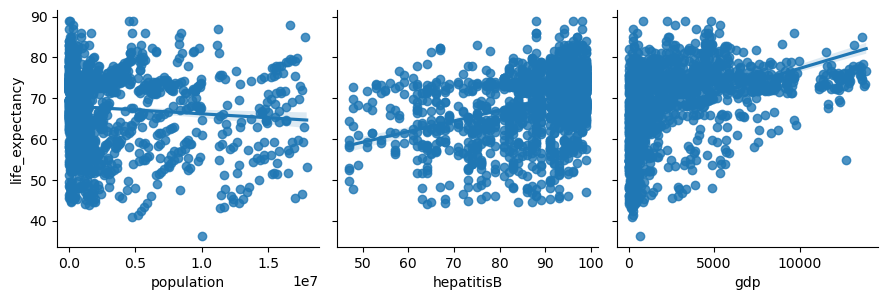

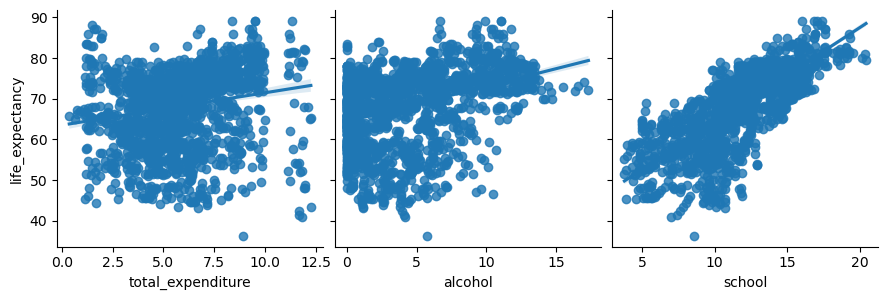

In [35]:
# visualizando novamente as relacoes, agora sem os outliers
dsa_get_pairs(novo_df3, alvo, atributos, 3)

In [36]:
# tratando valores ausentes
# para os valores ausentes a decisão foi preencher com a mediana

# dado que ja excluimos os outliers, agora iremos preencher com a mediana
# caso la na frente, possivelmente as métricas do modelo nao estiverem boas
# deve-se retornar e ir reanalizando, outliers, valores ausentes etc.
# talvez la na frente poderá ser observado que o melhor era excluir...
valores_ausentes = novo_df3.isnull().sum().sort_values(ascending = False)

In [37]:
# percentual de valores ausentes
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df3.shape[0] 
valores_ausentes_percent * 100

population           24.168297
hepatitisB           19.129159
gdp                  18.395303
total_expenditure     7.876712
alcohol               6.653620
school                6.555773
thinness_till9        0.587084
thinness_till19       0.587084
bmi                   0.587084
life_expectancy       0.391389
adult_mortality       0.391389
polio                 0.146771
diphtheria            0.146771
dtype: float64

In [38]:
# funcao para o replace das linhas vazias com a mediana
def impute_median(dados):
    return dados.fillna(dados.median())

In [39]:
novo_df3.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [40]:
# Removendo valores missing (observe as diferentes formas de notação do lado esquerdo do sinal de igual)
novo_df3.population = novo_df3['population'].transform(impute_median)
novo_df3.hepatitisB = novo_df3['hepatitisB'].transform(impute_median)
novo_df3.alcohol = novo_df3['alcohol'].transform(impute_median)
novo_df3.total_expenditure = novo_df3['total_expenditure'].transform(impute_median)
novo_df3.gdp = novo_df3['gdp'].transform(impute_median)
novo_df3.school = novo_df3['school'].transform(impute_median)

In [41]:
# verificando o total de valores ausentes
valores_ausentes = novo_df3.isnull().sum().sort_values(ascending = False)

In [42]:
valores_ausentes

bmi                  12
thinness_till9       12
thinness_till19      12
adult_mortality       8
life_expectancy       8
diphtheria            3
polio                 3
school                0
total_expenditure     0
gdp                   0
hiv                   0
country               0
measles               0
hepatitisB            0
alcohol               0
inf_death             0
status                0
year                  0
population            0
dtype: int64

In [43]:
novo_df3.bmi = novo_df3['bmi'].transform(impute_median)
novo_df3.thinness_till9 = novo_df3['thinness_till9'].transform(impute_median)
novo_df3.thinness_till19 = novo_df3['thinness_till19'].transform(impute_median)
novo_df3.life_expectancy = novo_df3['life_expectancy'].transform(impute_median)
novo_df3.diphtheria = novo_df3['diphtheria'].transform(impute_median)
novo_df3.polio = novo_df3['polio'].transform(impute_median)
novo_df3.adult_mortality = novo_df3['adult_mortality'].transform(impute_median)

In [44]:
# verificando o total de valores ausentes
valores_ausentes = novo_df3.isnull().sum().sort_values(ascending = False)
valores_ausentes

country              0
polio                0
school               0
thinness_till9       0
thinness_till19      0
total_expenditure    0
gdp                  0
hiv                  0
diphtheria           0
bmi                  0
life_expectancy      0
measles              0
hepatitisB           0
alcohol              0
inf_death            0
adult_mortality      0
status               0
year                 0
population           0
dtype: int64

In [45]:
novo_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 1 to 2937
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2044 non-null   object 
 1   life_expectancy    2044 non-null   float64
 2   year               2044 non-null   int64  
 3   status             2044 non-null   object 
 4   adult_mortality    2044 non-null   float64
 5   inf_death          2044 non-null   int64  
 6   alcohol            2044 non-null   float64
 7   hepatitisB         2044 non-null   float64
 8   measles            2044 non-null   int64  
 9   bmi                2044 non-null   float64
 10  polio              2044 non-null   float64
 11  diphtheria         2044 non-null   float64
 12  hiv                2044 non-null   float64
 13  gdp                2044 non-null   float64
 14  total_expenditure  2044 non-null   float64
 15  thinness_till19    2044 non-null   float64
 16  thinness_till9     2044 

In [46]:
# correlacao das variaveis numericas no conjunto de dados
novo_df3.corr()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
life_expectancy,1.000000,0.202723,-0.660914,-0.207579,0.341291,0.255758,-0.115537,0.553655,0.454543,0.485799,-0.571508,0.361359,0.179399,-0.431440,-0.427277,0.708913,-0.104957
year,0.202723,1.000000,-0.089938,-0.060689,-0.068215,-0.001797,-0.064797,0.101399,0.145051,0.226317,-0.157897,0.168355,0.069901,-0.063873,-0.060464,0.213327,0.019542
adult_mortality,-0.660914,-0.089938,1.000000,0.100566,-0.149904,-0.187031,0.035689,-0.363482,-0.232744,-0.225720,0.511662,-0.199522,-0.094989,0.297071,0.300487,-0.389305,0.096049
inf_death,-0.207579,-0.060689,0.100566,1.000000,-0.127053,-0.122514,0.480322,-0.221152,-0.183793,-0.184447,0.039075,-0.120329,-0.122060,0.320549,0.353495,-0.215387,0.112512
alcohol,0.341291,-0.068215,-0.149904,-0.127053,1.000000,0.191725,-0.044979,0.300685,0.186016,0.198299,-0.034290,0.291179,0.261273,-0.381082,-0.374064,0.461796,-0.005419
hepatitisB,0.255758,-0.001797,-0.187031,-0.122514,0.191725,1.000000,-0.042954,0.116727,0.390935,0.389724,-0.090485,0.166107,0.043760,-0.087582,-0.103638,0.257695,-0.057449
measles,-0.115537,-0.064797,0.035689,0.480322,-0.044979,-0.042954,1.000000,-0.141865,-0.110340,-0.122715,0.024438,-0.065375,-0.101357,0.133430,0.136974,-0.089177,-0.004719
bmi,0.553655,0.101399,-0.363482,-0.221152,0.300685,0.116727,-0.141865,1.000000,0.252268,0.272046,-0.244382,0.318197,0.199931,-0.544085,-0.552690,0.540217,-0.058804
polio,0.454543,0.145051,-0.232744,-0.183793,0.186016,0.390935,-0.110340,0.252268,1.000000,0.678892,-0.144499,0.198575,0.146146,-0.165425,-0.165009,0.386091,-0.044978
diphtheria,0.485799,0.226317,-0.225720,-0.184447,0.198299,0.389724,-0.122715,0.272046,0.678892,1.000000,-0.154922,0.222588,0.162285,-0.188187,-0.185748,0.433320,-0.034813


In [47]:
# funcao para filtrar e visualizar correlacao
def filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):

    # Calcula a matriz de correlação
    corr = df.corr()
    
    # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

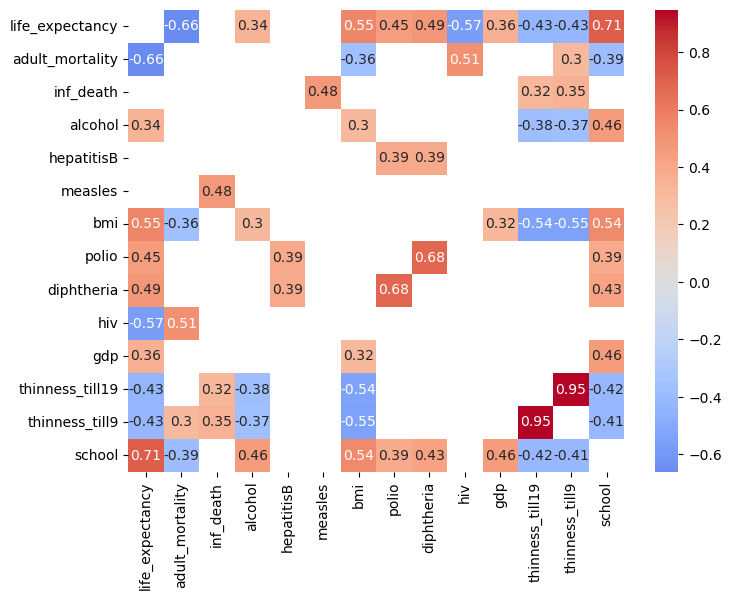

In [48]:
# execucao da funcao
# para este caso, foi escolhido um threshold = 0.3 (filtro de correlacao)
# com as variaveis que apresentam correlacao maior que 0.3, seja ela positiva ou negativa.
filtrar_e_visualizar_correlacao(novo_df3, threshold = 0.3, drop_column = None)

In [49]:
# agora para realizar a regressao multipla vamos utilizar as variaveis
# adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle 
# pois estas sao as que possuem uma correlacao maior com a variavel alvo
# mas antes, vamos verificar se existe muticolineariedade
# ou seja, se mais de uma variavel "representa a mesma coisa"
# para isso vamos considerar 0.5 como marca de corte. Vamos filtrar mais uma vez a matriz de correlação.

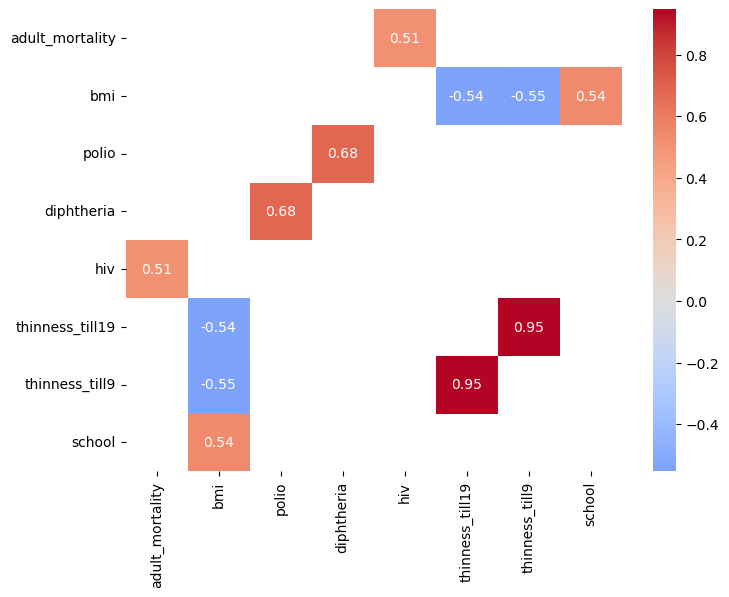

In [51]:
filtrar_e_visualizar_correlacao(novo_df3, threshold = 0.5, drop_column = 'life_expectancy')

In [52]:
# avaliando 

# Multicolinearidade 

# Com base no filtro de multicolinearidade, 
# as variáveis adult_mortality, bmi, diphtheria, hiv, gdp, thinness_till19, school e 
# serão as variáveis mantidas para a modelagem estatística.

In [53]:
# preparando o dataset final para a regressao multipla
df_final = pd.DataFrame({'life_expectancy': novo_df3['life_expectancy'],
                         'bmi': novo_df3['bmi'],
                         'adult_mortality': novo_df3['adult_mortality'],
                         'diphtheria': novo_df3['diphtheria'],
                         'hiv': novo_df3['hiv'],
                         'gdp': novo_df3['gdp'],
                         'thinness_till19': novo_df3['thinness_till19'],
                         'school': novo_df3['school'],
                        })

In [55]:
df_final.head()

,life_expectancy,bmi,adult_mortality,diphtheria,hiv,gdp,thinness_till19,school
1,59.9,18.6,271.0,62.0,0.1,612.696514,17.5,10.0
3,59.5,17.6,272.0,67.0,0.1,669.959000,17.9,9.8
4,59.2,17.2,275.0,68.0,0.1,63.537231,18.2,9.5
5,58.8,16.7,279.0,66.0,0.1,553.328940,18.4,9.2
6,58.6,16.2,281.0,63.0,0.1,445.893298,18.6,8.9


In [56]:
from sklearn.linear_model import LinearRegression

# Definindo X e y
X = df_final[['bmi', 'adult_mortality', 'diphtheria', 'hiv', 'gdp', 'thinness_till19', 'school']]
y = df_final['life_expectancy']

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Mostrar coeficientes
print("Intercepto (β₀):", modelo.intercept_)
print("Coeficientes (β₁, β₂, ...):", modelo.coef_)
print("R² (score):", modelo.score(X, y))

Intercepto (β₀): 49.962271616297386
Coeficientes (β₁, β₂, ...): [ 4.96703270e-02 -2.04219832e-02  7.74057047e-02 -4.77689531e-01
  6.06168250e-05 -8.40769144e-02  1.24317605e+00]
R² (score): 0.7785305316476885


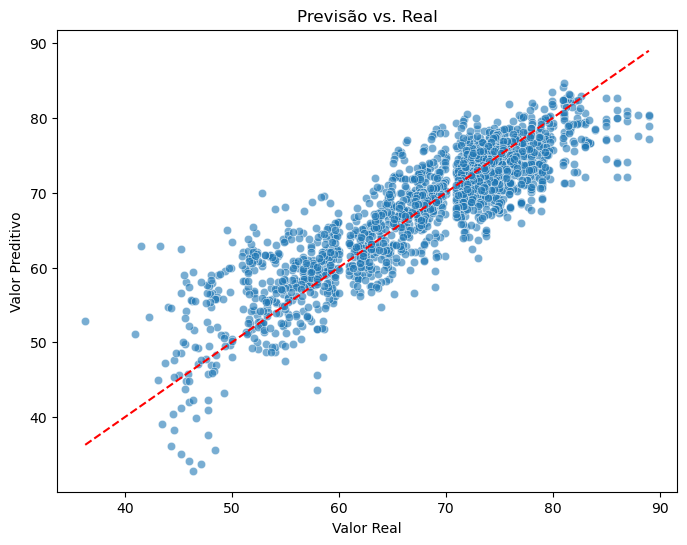

In [57]:
# grafico
y_pred = modelo.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Linha de referência (y=x)
plt.xlabel('Valor Real')
plt.ylabel('Valor Preditivo')
plt.title('Previsão vs. Real')
plt.show()